### Cell importeerd pandas, numpy, matplotlib, seaborn en leest de twee benodigde data sheets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

forest = pd.read_csv('forest_area.csv')
city = pd.read_csv('city_temperature_preprocessed.csv')

<hr>

### Cell berekend de bosoppervlakte per jaar en maakt een lijst van de jaren voor de grafiek

In [2]:
forest_area_per_year = forest.iloc[:, 6:35].sum()
years = list(range(1992, 2021))
even_years = years[::2]

### Cell maakt grafiek 1

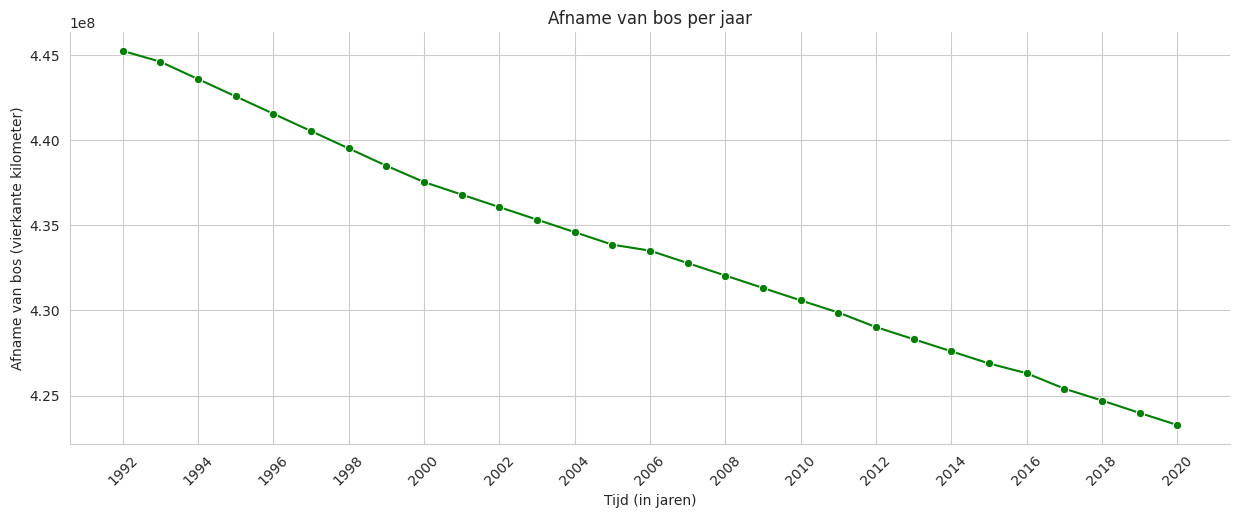

In [3]:
sns.set_style("whitegrid")
ax = sns.relplot(
    x=years,
    y=forest_area_per_year,
    kind="line",
    height=5,
    aspect=2.5,
    marker="o",
    color="green",
)
plt.xticks(even_years, even_years, rotation=45)
ax.set(
    ylabel="Afname van bos (vierkante kilometer)",
    xlabel="Tijd (in jaren)",
    title="Afname van bos per jaar",
)
plt.show()

# Onderbouwing Grafiek 1

### Grafiekkeuze

Wij hebben voor een lijnplot gekozen omdat dit het beste een afname over tijd laat zien. De lijn hebben we groen gemaakt om beter het bos te representeren. 

### Verwijderde clutter

Verder hebben wij er voor gekozen om de visualisatie te starten vanaf jaar 1992. Dit hebben we gedaan omdat anders de afname niet goed te zien is omdat 1990 tot 1992 een onnatuurlijke groei in bos toont, dit hebben wij dus als clutter verwijdert. Ook hebben we gekozen om in plaats van alle jaren op de x as te zetten, de jaren met een toename van 2 jaar te laten zien om de x as niet te vol te maken.

### Preattentives

Om de aandacht van het publiek te trekken hebben we gekozen voor "o" markers, zodat elk jaar makkelijk in te zien is op de grafiek. Verder hebben we gekozen om een "whitegrid" toe te voegen zodat de y as makkelijker af te lezen is in de grafiek.

In [4]:
forest_area_per_year2 = forest.iloc[:, 7:36]
years2 = list(range(2018, 2020))

# Grafiek 2

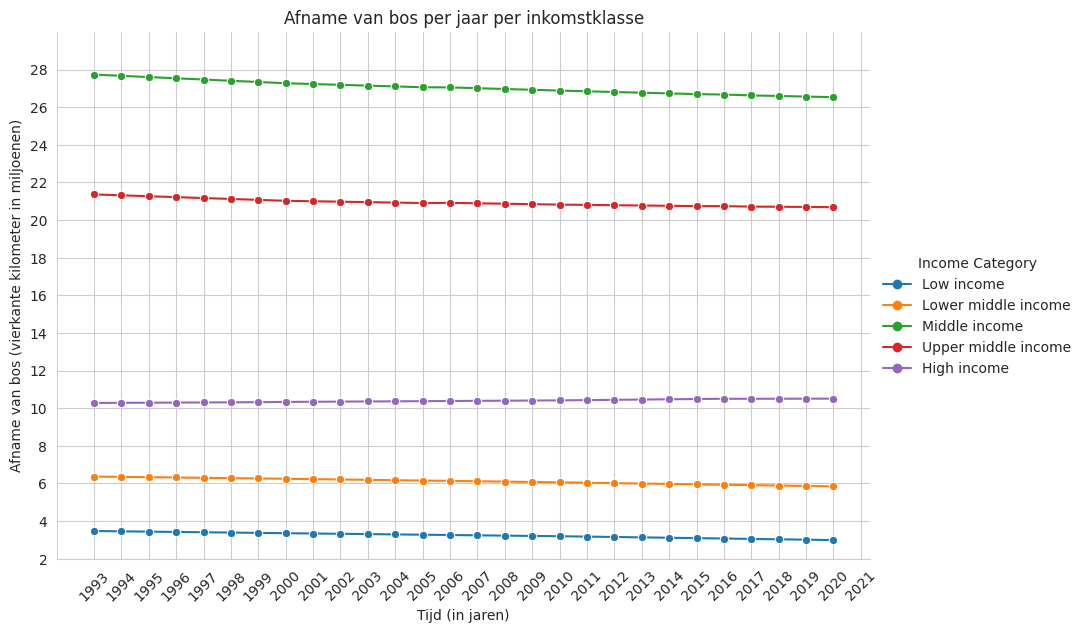

In [5]:
forest2 = pd.read_csv('forest_area.csv')
forest2 = forest2.set_index('Country Name')
forest2 = forest2.T
forest2 = forest2.iloc[6:35]

forest2_long = forest2[['World', 'Low income', 'Lower middle income', 'Middle income', 'Upper middle income',
'High income']]
forest2['Year'] = forest2.index
forest2_long = forest2.melt(id_vars=['Year'],
value_vars=['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income']
,var_name='Income Category', value_name='Forest Loss')

forest2_long['Forest Loss'] /=1e6

sns.set_style("whitegrid")
ax = sns.relplot(data=forest2_long, x='Year', y='Forest Loss', kind='line', height=6
,aspect=1.5, marker='o', hue='Income Category')
plt.xticks(rotation=45)
ax.set(xlabel='Tijd (in jaren)', ylabel='Afname van bos (vierkante kilometer in miljoenen)',
title='Afname van bos per jaar per inkomstklasse')
ax.set_xticklabels(['1993','1994','1995','1996',
'1997','1998','1999','2000','2001','2002','2003','2004','2005'
,'2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
plt.yticks(range(2, 30, 2))
plt.ylim(2,30)
plt.show()

Onderbouwing grafiek 2:
Door een lijngrafiek te gebruiken laten we het afname (en toename bij High income) zien over de jaren. We hebben gekozen om vanaf 1993 de jaren te laten zien omdat er anders in 1 jaar erg veel bos bij komt en dit niet logisch is. Verder hebben we y-ticks per 2 neergezet zodat er nog te zien is dat er een afname is zonder dat er teveel clutter is. We hebben de hoogte van de y as aangepast om de schaal te verbeteren. Ook door de aanpassing van aspect wordt de grafiek duidelijker af te lezen. Dit hebben we ook gedaan door de jaren op de x as te hernoemen naar alleen het jaar. We hebben ook gekozen om een 'whitegrid' toe te voegen zodat de y as makkelijker af te lezen is.

# Grafiek nummer 3

/tmp/ipykernel_83/1008335929.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['2018', '2019', '2020'])


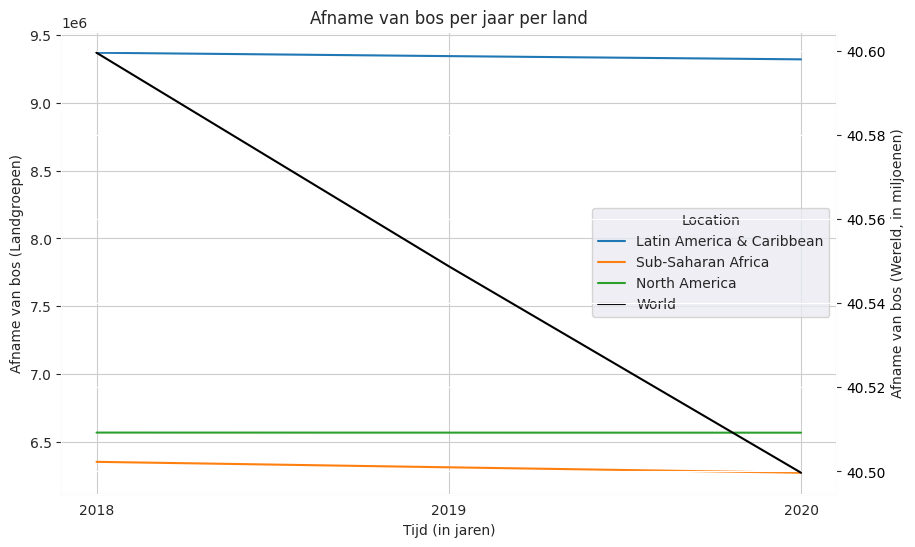

In [6]:

forest3 = pd.read_csv('forest_area.csv')
forest3 = forest3.set_index('Country Name').T
forest3 = forest3.iloc[31:34] 
forest3['Year'] = forest3.index
forest3_long = pd.melt(
    forest3,
    id_vars=['Year'],
    value_vars=['World', 'Latin America & Caribbean', 'Sub-Saharan Africa', 'North America'],
    var_name='Country',
    value_name='Forest Loss'
)


forest3_long.loc[forest3_long['Country'] == 'World', 'Forest Loss'] /= 1e6


world_data = forest3_long[forest3_long['Country'] == 'World']
regions_data = forest3_long[forest3_long['Country'] != 'World']


fig, ax1 = plt.subplots(figsize=(10, 6))
sns.set_style('darkgrid')


sns.lineplot(data=regions_data, x='Year', y='Forest Loss', hue='Country',markers='o', ax=ax1)
ax1.set_xlabel('Tijd (in jaren)')
ax1.set_ylabel('Afname van bos (Landgroepen)')
ax1.set_title('Afname van bos per jaar per land')
ax1.set_xticklabels(['2018', '2019', '2020'])


ax2 = ax1.twinx()
line_world = sns.lineplot(data=world_data, x='Year', y='Forest Loss', color='black', label='World',legend=False, markers='o', ax=ax2)
ax2.set_ylabel('Afname van bos (Wereld, in miljoenen)')
ax2.tick_params(axis='y', labelcolor='black')

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2, labels=labels1 + labels2, title='Location', loc='center right')


plt.show()


Onderbouwing grafiek 3:
Om het verschil tussen world en countries te kunnen zien hebben ervoor gekozen om een 2e y-as te gebruiken. Om het verschil aan te tonen hebben we verschillende kleuren gebruikt. We hebben ervoor gekozen om maar 1 grid te gebruiken omdat er anders veel clutter is. We hebben de markers weg gehaald omdat er naar 3 jaren te zien zijn. Ook hebben we de twee legendas gecombineerd in één legenda om onnodige clutter in twee legendas te voorkomen. We hebben de waardes hetzelfde gemaakt omdat het dan makkelijker af te lezen is.

# Grafiek nummer 4

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


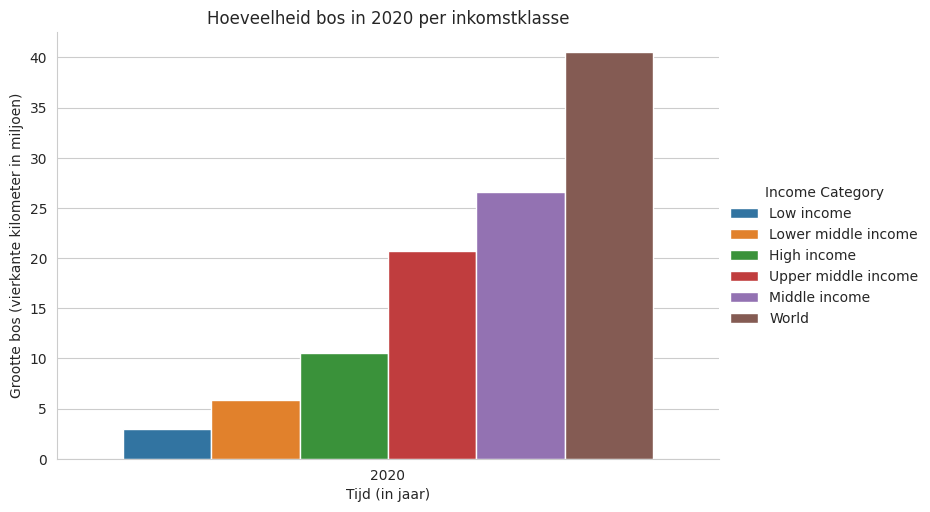

In [14]:
forest4 = pd.read_csv('forest_area.csv')
forest4yr = forest4.set_index('Country Name') #Wij maken alle landen de index
forest4yr = forest4yr.T #Hiermee zorg ik dat alle landen nu kolommen zijn
forest4yr = forest4yr.iloc[33:34] #Ik selecteer alleen het jaar 2020
forest4yr['Year'] = forest4yr.index #Ik maak de kolom 'Year' aan.
forest4yr_long = pd.melt(forest4yr, id_vars=['Year'],
value_vars=['Low income','Lower middle income', 'Middle income','Upper middle income','High income','World']
,var_name='Income Category', value_name='Forest Loss') #Door melt te gebruiken kan ik makkelijker tabellen maken
#laat hij mij doen zonder moeilijkheden.
forest4yr_long_sorted = forest4yr_long.sort_values(by='Forest Loss', ascending=True) #Ik soorteer van laag naar hoog
#zodat de barplot er beter uit ziet.
forest4yr_long_sorted['Forest Loss'] /= 1e6 #Hiermee delen we alle waardes door 1 miljoen zodat de y schaal 1 miljoen is.

ax4 = sns.catplot(data=forest4yr_long_sorted, x='Year', y='Forest Loss', kind='bar', height=5, aspect=1.5, hue='Income Category')
ax4.set(xlabel='Tijd (in jaar)', xticklabels=['2020'], ylabel='Grootte bos (vierkante kilometer in miljoen)', title='Hoeveelheid bos in 2020 per inkomstklasse')
plt.show()


Onderbouwing grafiek 4:
Wij hebben hier gekozen voor een barplot omdat het maar 1 jaar is en je het verschil tussen de inkomens hier goed kan zien. We hebben de groepen gesoorteerd van laag naar hoog omdat dit fijn is om naar te kijken. De y-as hebben we per miljoen ingesteld omdat het dan makkelijker is om af te lezen. De x-as werd aangepast naar alleen het jaar, voorheen werd het benoemd als: "2020 [YR2020]". We hebben de whitegrid gebruikt en de aspect aangepast om de grafiek duidelijker te maken.

# Grafiek 5

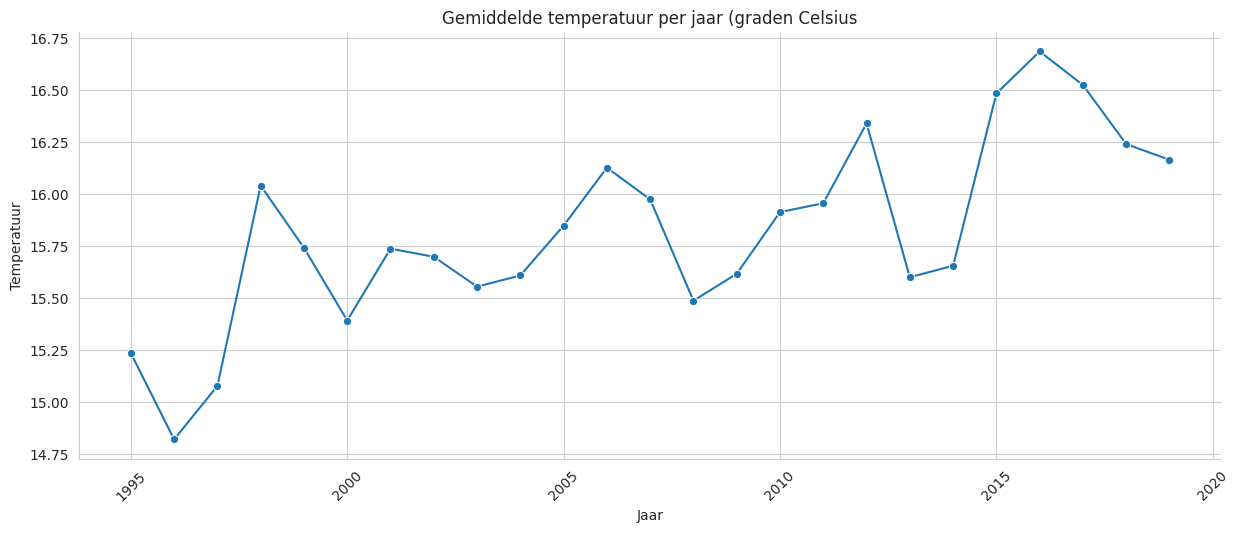

In [22]:
df = pd.read_csv('city_temperature_preprocessed.csv')
worldtemp = df.groupby(['Year'])['AvgTemperature'].mean()
df2 = pd.DataFrame({'Year': worldtemp.index, 'AvgTemperature': worldtemp.values})

sns.set_style("whitegrid")
ax = sns.relplot(data=df2, x='Year', y='AvgTemperature', kind='line', aspect=2.5, marker='o')
plt.xticks(rotation=45)
ax.set(
        xlabel='Tijd (in jaren)',
        ylabel='Temperatuur', 
        title='Gemiddelde temperatuur per jaar (graden Celsius')
plt.show()

Onderbouwing grafiek 5:

Voor de grafiek hebben wij gekozen om weer een lineplot te maken. Dit komt omdat de lijnplot de verandering van temperatuur over de jaren het mooist weergeeft in een strak getekende lijn. Om clutter te verwijderen hebben we de grafiek per 5 jaren op de x as laten lopen, van 1995 tot 2020 zodat de x-as niet te vol zou raken en hebben we als preattentives de 'o' markers gebruikt om toch snel te kunnen pinpointen naar een jaar wat niet met een 0 of 5 eindigt.

# Grafiek 6

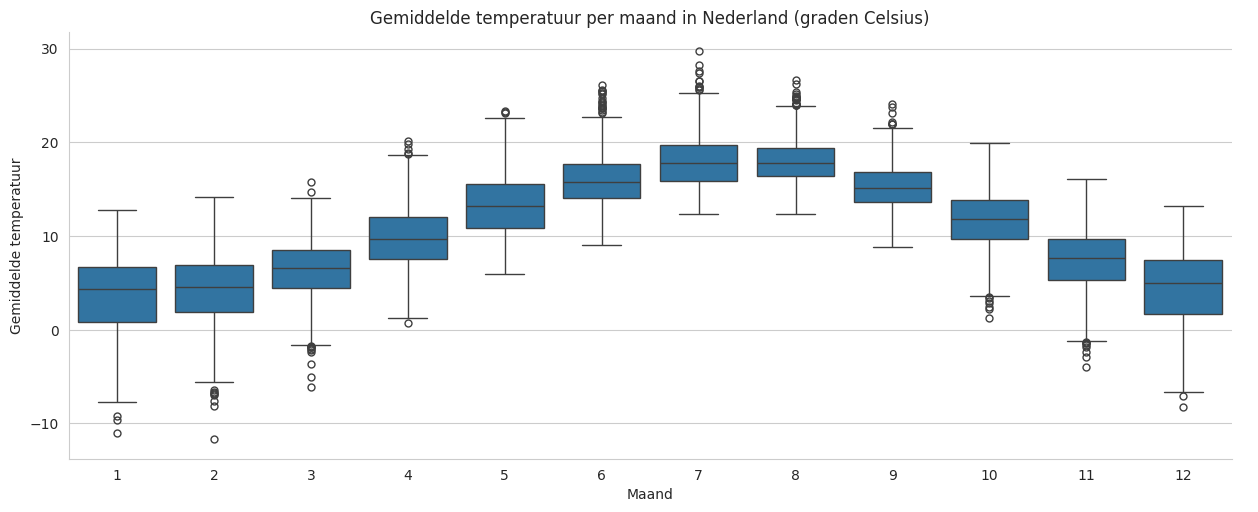

In [25]:
df3 = pd.read_csv('city_temperature_preprocessed.csv')
df3 = df3[df3['Country'] == 'The Netherlands']

sns.set_style("whitegrid")
ax = sns.catplot(data=df3, x='Month', y='AvgTemperature', kind='box', aspect=2.5, height=5)
ax.set(
    xlabel='Tijd (in maanden)', 
    ylabel='Gemiddelde temperatuur',
    title='Gemiddelde temperatuur per maand in Nederland (graden Celsius)')
plt.show()

Onderbouwing grafiek 6:

Hier is gekozen voor een boxplot omdat er hier te maken is met best wel wat outliers, die we graag wilden visualiseren. In deze grafiek was geen sprake van clutter, de outliers zijn belangrijk voor het laten zien van de pieken en dalen van een maand zonder het gemiddelde dwars te zitten, voor preattentives hebben we gekozen voor de whitegrid, zodat de temperaturen wat beter af te lezen zijn.

# Referenties

Referentielijst: 
Melt functie via ChatGPT: https://chatgpt.com/share/67499779-0330-800f-9e79-c1b68d3caa08
Aangezien wij niet wisten hoe we het probleem aan moesten pakken hebben we ChatGPT ingeschakeld. Dit heeft ons erg geholpen door de hele opdracht heen. Wij hebben hierna zelf de melt functie toegepast.

GRAFIEK 3: 
Tijdens het maken van grafiek 3 zijn we er niet uit gekomen om ervoor te zorgen dat de schaling past bij de grafiek. Hier hebben we uiteindelijk, na veel denken en proberen. ChatGPT om hulp gevraagd. Nadat chatGPT ons heeft geholpen hebben we zelf nog een aantal dingen aangepast om de grafiek naar onze wens te maken. Voordat ChatGPT ons geholpen heeft zag de grafiek er niet uit, er het verschil was niet te zien tussen world en de andere landgroeperingen. https://chatgpt.com/share/6749a44a-93b0-800f-8900-96897badf0b3


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=80045a7a-1c20-477c-81e9-1029f1b902c1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>